# **Programming Assessment Report (gradslam + 3D computer vision)**

##### **Name:** Sai Sree Harsha
##### **Email:** sreesai1412@gmail.com



### **Introduction**

gradSLAM [1] is a fully differentiable dense SLAM framework. It allows for gradient flow from the outputs of an RGB-D SLAM system (trajectory, 3D map of the environment) all the way through to its inputs (color and depth images). In this assessment, the task is to use this capability to recover missing color and depth observations from an image sequence.

We are given a sequence of four RGB-Dimages { (I​1, ​D​1)​, (I​2, ​D​2)​, (I​3,​ D​3)​, (I​4, ​D​4)​ } along with the camera intrinsics and the ground-truth extrinsics (i.e., camera poses). The fourth RGB-D pair (I​4,​ D​4)​ is corrupted by adding noise or replacing it entirely with a constant value. The goal is to leverage gradients from gradslam to reconstruct (I​4,​ D​4)​ without directly accessing this RGB-D pair.

The fourth frame before being corrupted is shown below.

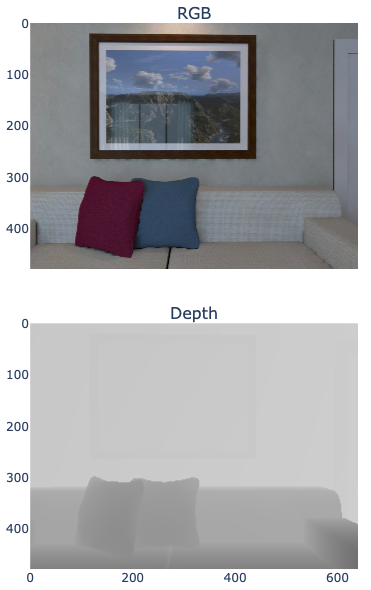

### **1) Obtaining the ground-truth 3D reconstruction**

We construct an *RGBDImages* object using the 4 RGB-D image pairs corresponding to the first 4 frames from the dataset. We obtain the ground-truth point cloud by passing this *RGBDImages* object through *PointFusion*.

### **2) Reconstruction losses**

We define the following 3 loss functions for comparing the ground-truth 3D reconstruction with the reconstruction obtained from the corrupted set.

#### **a) Chamfer distance:** 
We find the Chamfer distance from the point cloud of the corrupted reconstruction to that of the ground-truth.

#### **b) MSE Loss:** 
We render the corrupted as well as the ground-truth point clouds using a differentiable renderer provided by PyTorch3D [2] and find the L2 distance between the 2 RGB images obtained upon rendering.

#### **c) Perceptual Loss:** 
We render the corrupted as well as the ground-truth point clouds using a differentiable renderer provided by PyTorch3D [2] and find the Perceptual Similarity metric as proposed by [3] between the 2 RGB images obtained upon rendering.

### **3) Part 1**

The fourth RGB image is replaced by a tensor of the same shape but containing 255.0 at all indices. The fourth depth image is replaced by a tensor of the same shape but containing 2.55 at all indices. The 3D reconstruction is obtained using *PointFusion* and compared to the ground-truth using Chamfer distance and MSE loss. 

Gradients of this comparison are then backpropagated to the corrupted RGB-D image to update it using stochastic gradient descent. We use the Adam [4] optimizer with a learning rate of 0.01, and perform optimization for 400 iterations.

A GIF of the optimization process is shown below.

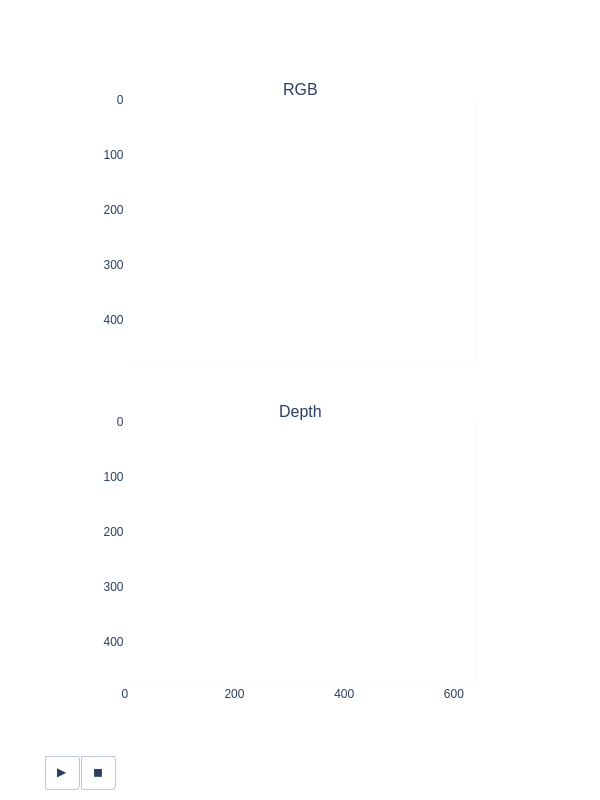

### **4) Part 2**

Gaussian noise with a mean and standard deviation of 15 is added to the fourth RGB image. Gaussian noise with a mean of 0 and standard deviation of 0.1 is added to the fourth depth image. The 3D reconstruction is obtained using *PointFusion* and compared to the ground-truth using Chamfer distance and MSE loss.

Gradients of this comparison are then backpropagated to the corrupted RGB-D image to update it using stochastic gradient descent. We use the Adam [4] optimizer with a learning rate of 0.01, and perform optimization for 400 iterations.

A picture of the noisy image as well as the result of the optimization process is shown below.

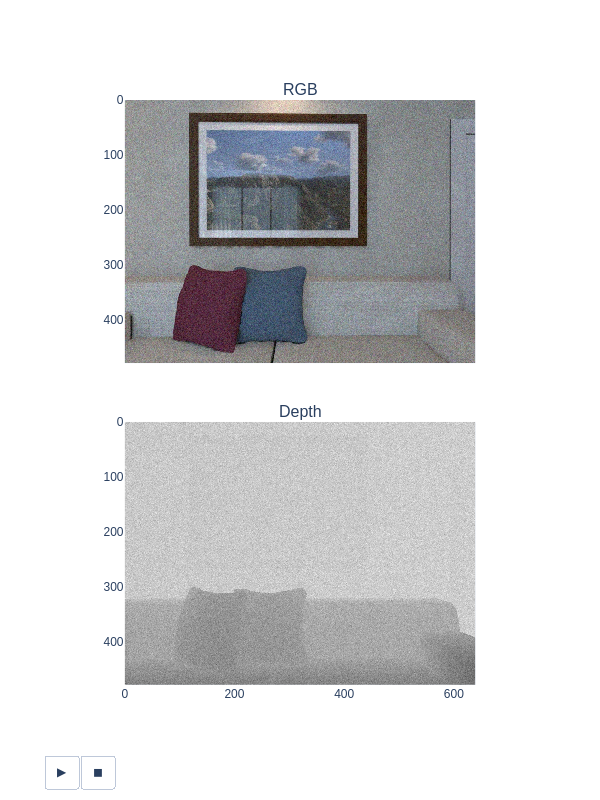

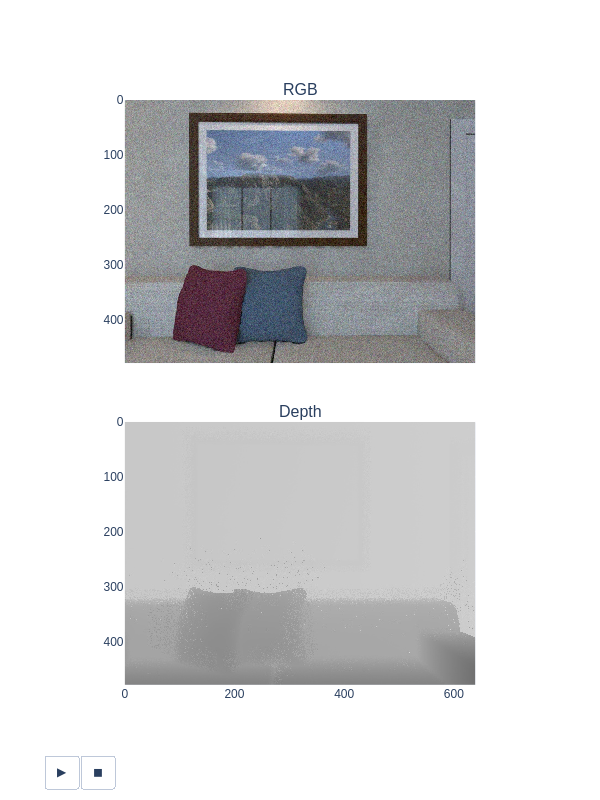

### **5) Part 3**

The fourth RGB image is replaced by a tensor of the same shape but containg 255.0 at all indices. The fourth depth image is left unchanged. The 3D reconstruction is obtained using *PointFusion* and compared to the ground-truth using Perceptual Similarity [3] loss.

Gradients of this comparison are then backpropagated to the corrupted RGB-D image to update it using stochastic gradient descent. We use the Adam [4] optimizer with a learning rate of 0.01, and perform optimization for 2000 iterations.

A GIF of the optimization process is shown below.

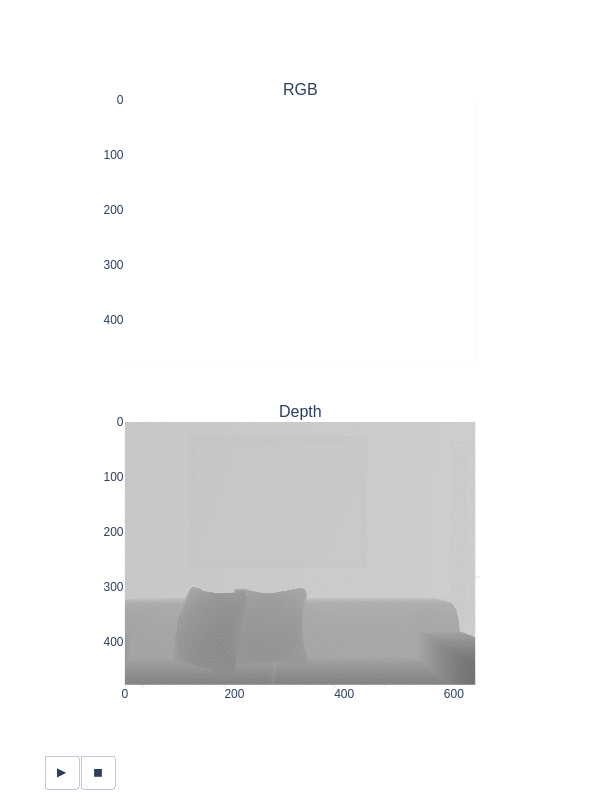

## **References**

[1] Krishna Murthy Jatavallabhula, Soroush Saryazdi, Ganesh Iyer, & Liam Paull. (2020). gradSLAM: Automagically differentiable SLAM.  https://arxiv.org/abs/1910.10672

[2] Nikhila Ravi, Jeremy Reizenstein, David Novotny, Taylor Gordon, Wan-Yen Lo, Justin Johnson, & Georgia Gkioxari. (2020). Accelerating 3D Deep Learning with PyTorch3D.  https://arxiv.org/abs/2007.08501

[3] Zhang, R., Isola, P., Efros, A.A., Shechtman, E., Wang, O.: The unreasonable effectiveness of deep networks as a perceptual metric. In: CVPR (2018). https://arxiv.org/abs/1801.03924

[4] Diederik P. Kingma and Jimmy Ba (2015). Adam: A Method for Stochastic Optimization. In 3rd International Conference on Learning Representations, ICLR 2015, San Diego, CA, USA.